# Ultimate guide to deal with Text Data (using Python) – for Data Scientists and Engineers

Source: https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

SHUBHAM JAIN, FEBRUARY 27, 2018

__Import Libraries__

In [27]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
data = pd.read_csv('text_practice.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## 1. Basic Feature Extraction

### 1.1 Number of Words

One of the most basic features we can extract is the number of words in each tweet. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

In [7]:
data['word_count'] = data['tweet'].apply(lambda x: len(x.split(' ')))
data[['tweet', 'word_count']].head()

,tweet,word_count
0,@user when a father is dysfunctional and is s...,21
1,@user @user thanks for #lyft credit i can't us...,22
2,bihday your majesty,5
3,#model i love u take with u all the time in ...,17
4,factsguide: society now #motivation,8


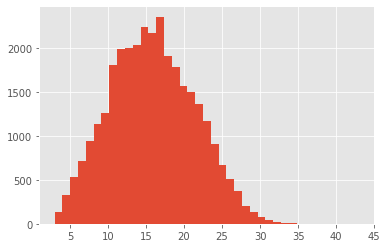

In [4]:
data['word_count'].hist(bins=int(np.sqrt(len(data) / 20)));

### 1.2 Number of Characters

Based on the same feature intuition as above.

In [9]:
data['char_count'] = data['tweet'].str.len()
data[['tweet', 'char_count']].head()

,tweet,char_count
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,86
4,factsguide: society now #motivation,39


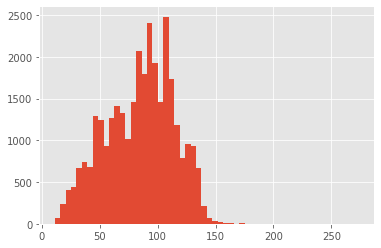

In [6]:
data['char_count'].hist(bins=int(np.sqrt(len(data) / 10)));

### 1.3 Average Word Length

In [16]:
def avg_word(sentence):
    words = sentence.split()
    return sum(len(word) for word in words) / len(words)

data['avg_word'] = data['tweet'].apply(avg_word)
data[['tweet', 'avg_word']].head()

,tweet,avg_word
0,@user when a father is dysfunctional and is s...,4.555556
1,@user @user thanks for #lyft credit i can't us...,5.315789
2,bihday your majesty,5.666667
3,#model i love u take with u all the time in ...,4.928571
4,factsguide: society now #motivation,8.000000


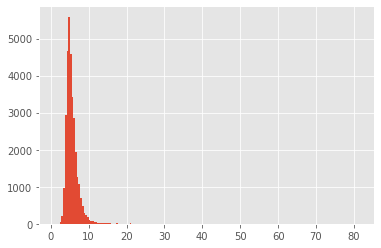

In [18]:
data['avg_word'].hist(bins=int(np.sqrt(len(data))));

In [19]:
data['avg_word'].describe()

count    31962.000000
mean         5.593463
std          1.945719
min          1.000000
25%          4.529412
50%          5.200000
75%          6.200000
max         81.333333
Name: avg_word, dtype: float64

In [24]:
longest_tweet = data.iloc[np.argmax(data['avg_word'])]

In [26]:
longest_tweet.tweet

'awesom beautiful wonderfulð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98±ð\x9f\x98±ð\x9f\x98±ð\x9f\x98±ð\x9f\x98±ð\x9f\x98±ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x9að\x9f\x98\x8eð\x9f\x98\x8eð\x9f\x98\x8eð\x9f\x98\x8eð\x9f\x99\x8bð\x9f\x99\x8bð\x9f\x99\x8bð\x9f\x99\x8fð\x9f\x99\x8fð\x9f\x99\x8fð\x9f\x99\x8fð\x9f\x98»ð\x9f\x98»ð\x9f\x98»ð\x9f\x98» '

### !.4 Number of Stopwords

Generally, while solving an NLP problem, the first thing we do is to remove the stopwords. But sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

In [32]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords_count'] = data['tweet'].apply(lambda sentence: len([word for word in sentence.split() if word in stop]))
data[['tweet', 'stopwords_count']].head()

,tweet,stopwords_count
0,@user when a father is dysfunctional and is s...,10
1,@user @user thanks for #lyft credit i can't us...,5
2,bihday your majesty,1
3,#model i love u take with u all the time in ...,5
4,factsguide: society now #motivation,1


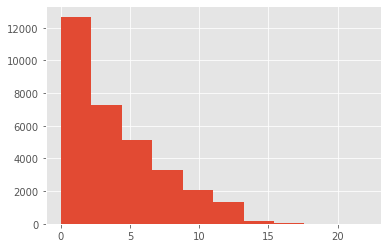

In [34]:
data['stopwords_count'].hist();

### 1.5 Number of Special Characters

One more interesting feature which we can extract from a tweet is calculating the number of hashtags or mentions present in it. This also helps in extracting extra information from our text data.

In [36]:
def count_hastags_mentions(sentence):
    words = [word for word in sentence.split() if word.startswith('@') or word.startswith('#')]
    return len(words)

data['hashtags_mentions_count'] = data['tweet'].apply(count_hastags_mentions)
data[['tweet', 'hashtags_mentions_count']].head()

,tweet,hashtags_mentions_count
0,@user when a father is dysfunctional and is s...,2
1,@user @user thanks for #lyft credit i can't us...,5
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,1
4,factsguide: society now #motivation,1


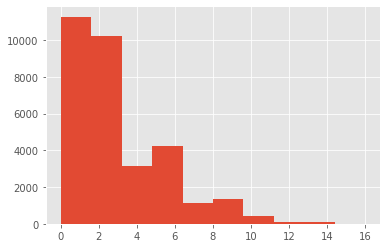

In [38]:
data['hashtags_mentions_count'].hist();

### 1.6 Number of Numerics

In [39]:
data['numerics_count'] = data['tweet'].apply(lambda sentence: len([word for word in sentence.split() if word.isdigit()]))
data[['tweet', 'numerics_count']].head()

,tweet,numerics_count
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


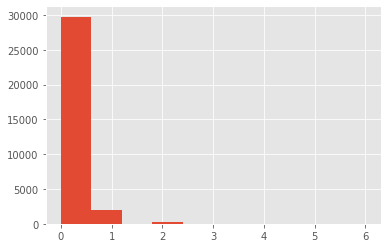

In [41]:
data['numerics_count'].hist();

### 1.7 Number of Uppercase Words

Anger or rage is quite often expressed by writing in UPPERCASE words which makes this a necessary operation to identify those words.

In [42]:
data['upper_count'] = data['tweet'].apply(lambda sentence: len([word for word in sentence.split() if word.isupper()]))
data[['tweet', 'upper_count']].head()

,tweet,upper_count
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
